# Feature Selection

Continuation of the previous exercise. Perform ***feature selection***. 


In [ ]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

 Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset 

<AxesSubplot:>

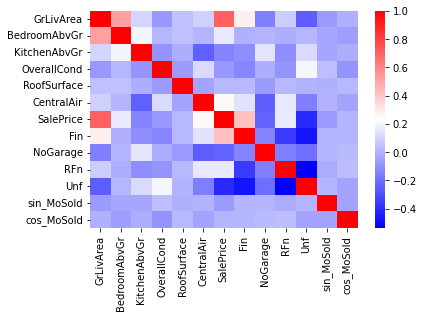

In [ ]:
import seaborn as sns

corr = data.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')


 Visualize the correlation between column pairs in a dataframe 

In [ ]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678


 How many pairs of features exceed a correlation of 0.9 or -0.9 

*Save the answer as an integer under variable name `correlated_features`*

In [ ]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

0

## (2) Base Modelling

 Prepare the feature set `X` and target `y`. 

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [ ]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

 Cross validate a Linear Regression model 

*Save the score under variable name `base_model_score`.*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.6458838723170981

## (3) Feature Permutation

 Perform a feature permutation and rank the features by order of importance. 

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True) # Order by importance
importance_df

,feature,feature importance
0,GrLivArea,1.10111
1,BedroomAbvGr,0.073953
5,Unf,0.035939
3,CentralAir,0.027916
4,Fin,0.025971
2,KitchenAbvGr,0.0256


 Which feature is the most important 

*Save your answer as a `string` under variable name `best_feature`.*

In [ ]:
best_feature = importance_df.feature[0]
best_feature

'GrLivArea'

## (4) Modelling with less complexity

 Drop the weak features and cross-validate a new model 

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.



In [ ]:
X = X.drop(columns=['RoofSurface','OverallCond','sin_MoSold','cos_MoSold','RFn','NoGarage']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6376353182930796

P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?